# ZS Associates - Identify Licence Status

# In this problem we have to identify the licence status, So LICENSE STATUS is the dependent column and rest of the columns are independent column

In [1]:
#Importing required Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pk
sns.set(style="ticks", color_codes=True)
pd.set_option('display.max_columns', None)
%matplotlib inline


In [2]:
#Importing dataset
dataset = pd.read_csv("train_file.csv")
testset = pd.read_csv("test_file.csv")

dataset.head()

C:\Users\ADMIN\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,APPLICATION CREATED DATE,APPLICATION REQUIREMENTS COMPLETE,PAYMENT DATE,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION,LICENSE STATUS
0,35342-20020816,1256593,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,2625 S CENTRAL PARK AVE 1,CHICAGO,IL,60623.0,22.0,28.0,22-28,10.0,1010,Limited Business License,35342.0,RENEW,NaN,2002-06-28T00:00:00,2002-08-21T00:00:00,N,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2006-04-11T00:00:00,NaN,25.0,41.843613,-87.714618,"{'latitude': '41.843612879431845', 'longitude'...",AAI
1,1358463-20051116,1639294,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,2825 W MONTROSE AVE,CHICAGO,IL,60618,33.0,23.0,33-23,17.0,1315,Mobile Food Dispenser,1358463.0,RENEW,NaN,2005-09-22T00:00:00,2005-11-03T00:00:00,N,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2006-06-12T00:00:00,2006-06-15T00:00:00,60.0,41.961132,-87.699626,"{'latitude': '41.96113244107215', 'longitude':...",AAC
2,1980233-20090722,1980233,345008,1,DJS REMODELING,"DJS REMODELING, INC.",1605 CLAVEY RD 1,HIGHLAND,IL,60035,NaN,NaN,NaN,NaN,1011,Home Repair,1980233.0,ISSUE,2009-06-29T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,N,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
3,1476582-20040211,1476582,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,8 NORTH TRAIL,LEMONT,IL,60439,NaN,NaN,NaN,NaN,1010,Limited Business License,1476582.0,ISSUE,2004-02-10T00:00:00,2004-02-10T00:00:00,2004-02-10T00:00:00,N,2004-02-11T00:00:00,2005-02-15T00:00:00,2004-02-10T00:00:00,2004-02-11T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
4,1141408-20080516,1896750,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,4081 JOSEPH DR,WAUKEGAN,IL,60087,NaN,NaN,NaN,NaN,1010,Limited Business License,1141408.0,RENEW,NaN,2008-03-24T00:00:00,2008-06-04T00:00:00,N,2008-05-16T00:00:00,2010-05-15T00:00:00,2008-06-04T00:00:00,2008-06-05T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI


In [3]:
dataset.shape

(85895, 32)

In [4]:
testset.shape

(57239, 31)

In [5]:
dataset.columns.values

array(['ID', 'LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME',
       'DOING BUSINESS AS NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP CODE',
       'WARD', 'PRECINCT', 'WARD PRECINCT', 'POLICE DISTRICT',
       'LICENSE CODE', 'LICENSE DESCRIPTION', 'LICENSE NUMBER',
       'APPLICATION TYPE', 'APPLICATION CREATED DATE',
       'APPLICATION REQUIREMENTS COMPLETE', 'PAYMENT DATE',
       'CONDITIONAL APPROVAL', 'LICENSE TERM START DATE',
       'LICENSE TERM EXPIRATION DATE', 'LICENSE APPROVED FOR ISSUANCE',
       'DATE ISSUED', 'LICENSE STATUS CHANGE DATE', 'SSA', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'LICENSE STATUS'], dtype=object)

In [6]:
testset.columns.values

array(['ID', 'LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME',
       'DOING BUSINESS AS NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP CODE',
       'WARD', 'PRECINCT', 'WARD PRECINCT', 'POLICE DISTRICT',
       'LICENSE CODE', 'LICENSE DESCRIPTION', 'LICENSE NUMBER',
       'APPLICATION TYPE', 'APPLICATION CREATED DATE',
       'APPLICATION REQUIREMENTS COMPLETE', 'PAYMENT DATE',
       'CONDITIONAL APPROVAL', 'LICENSE TERM START DATE',
       'LICENSE TERM EXPIRATION DATE', 'LICENSE APPROVED FOR ISSUANCE',
       'DATE ISSUED', 'LICENSE STATUS CHANGE DATE', 'SSA', 'LATITUDE',
       'LONGITUDE', 'LOCATION'], dtype=object)

In [7]:
print(dataset.shape)
dataset.isnull().sum()

(85895, 32)


ID                                       0
LICENSE ID                               0
ACCOUNT NUMBER                           0
SITE NUMBER                              0
LEGAL NAME                               0
DOING BUSINESS AS NAME                   1
ADDRESS                                  0
CITY                                     0
STATE                                    0
ZIP CODE                                31
WARD                                 49701
PRECINCT                             56701
WARD PRECINCT                        49700
POLICE DISTRICT                      54012
LICENSE CODE                             0
LICENSE DESCRIPTION                      0
LICENSE NUMBER                           1
APPLICATION TYPE                         0
APPLICATION CREATED DATE             64660
APPLICATION REQUIREMENTS COMPLETE      214
PAYMENT DATE                          1289
CONDITIONAL APPROVAL                     0
LICENSE TERM START DATE                228
LICENSE TER

In [8]:
columns = dataset.columns.values

In [9]:
for column in columns:
    print (column,":",dataset[column].nunique())

ID : 85895
LICENSE ID : 85895
ACCOUNT NUMBER : 38897
SITE NUMBER : 177
LEGAL NAME : 38744
DOING BUSINESS AS NAME : 41686
ADDRESS : 42146
CITY : 1223
STATE : 54
ZIP CODE : 2456
WARD : 50
PRECINCT : 76
WARD PRECINCT : 2383
POLICE DISTRICT : 28
LICENSE CODE : 106
LICENSE DESCRIPTION : 106
LICENSE NUMBER : 49768
APPLICATION TYPE : 5
APPLICATION CREATED DATE : 2899
APPLICATION REQUIREMENTS COMPLETE : 3078
PAYMENT DATE : 4356
CONDITIONAL APPROVAL : 2
LICENSE TERM START DATE : 2825
LICENSE TERM EXPIRATION DATE : 297
LICENSE APPROVED FOR ISSUANCE : 4223
DATE ISSUED : 3498
LICENSE STATUS CHANGE DATE : 3152
SSA : 53
LATITUDE : 21386
LONGITUDE : 21388
LOCATION : 21388
LICENSE STATUS : 5


#Drop rows those are having only one missing value as there the columns are haing unique values more than 40K

In [10]:
testset.isnull().sum()

ID                                       0
LICENSE ID                               0
ACCOUNT NUMBER                           0
SITE NUMBER                              0
LEGAL NAME                               0
DOING BUSINESS AS NAME                   2
ADDRESS                                  0
CITY                                     0
STATE                                    0
ZIP CODE                                12
WARD                                   626
PRECINCT                              1578
WARD PRECINCT                          616
POLICE DISTRICT                       1475
LICENSE CODE                             0
LICENSE DESCRIPTION                      0
LICENSE NUMBER                           0
APPLICATION TYPE                         0
APPLICATION CREATED DATE             44587
APPLICATION REQUIREMENTS COMPLETE      428
PAYMENT DATE                          1051
CONDITIONAL APPROVAL                     0
LICENSE TERM START DATE                118
LICENSE TER

In [11]:
dataset = dataset.dropna(axis=0, subset=['DOING BUSINESS AS NAME'])
#testset = testset.dropna(axis=0, subset=['DOING BUSINESS AS NAME'])

## Since I dont want to disturb the test data as it will disturb the prediction results at the end, so I am replaceing 
#two null values with the 0 in DOING BUSINESS AS NAME column

testset["DOING BUSINESS AS NAME"].fillna(0, inplace = True) 

dataset = dataset.dropna(axis=0, subset=['LICENSE NUMBER'])

In [12]:
# let's create a variable to replace NA with a random sample

def impute_na(df, variable):
    # random sampling
    df[variable+'_random'] = df[variable]
        
    # extract the random sample to fill the na
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    
    # pandas needs to have the same index in order to merge datasets
    random_sample.index = df[df[variable].isnull()].index
    
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample
    
# let's create a variable to replace NA with the most frequent label
def impute_na_most_frequent(df, variable):
    most_frequent_category = df.groupby([variable])[variable].count().sort_values(ascending=False).index[0]
    df[variable+ '_most_frequent'] = df[variable].fillna(most_frequent_category)
    
# let's create a variable to capture NA to indicate missingness
def impute_na_missing(df, variable):
    # add additional variable to indicate missingness
    df[variable+'_NA'] = np.where(df[variable].isnull(), 1, 0)
    
def impute_na_mean(df, variable):
    mean = df[variable].mean()
    df[variable+'_mean'] = df[variable].fillna(mean)

In [13]:
#Will perform random sample imputation on the ZIP CODE, APPLICATION REQUIREMENTS COMPLETE, LICENSE TERM START DATE,
#LICENSE TERM EXPIRATION DATE, LICENSE APPROVED FOR ISSUANCE, PAYMENT DATE 

impute_na(dataset,'ZIP CODE')
impute_na(dataset,'APPLICATION REQUIREMENTS COMPLETE')
impute_na(dataset,'LICENSE TERM START DATE')
impute_na(dataset,'LICENSE TERM EXPIRATION DATE')
impute_na(dataset,'LICENSE APPROVED FOR ISSUANCE')
impute_na(dataset,'PAYMENT DATE')

impute_na_most_frequent(dataset,'WARD PRECINCT')
impute_na_most_frequent(dataset,'WARD')
impute_na_most_frequent(dataset,'PRECINCT')
impute_na_most_frequent(dataset,'POLICE DISTRICT')
impute_na_most_frequent(dataset,'LICENSE STATUS CHANGE DATE')
impute_na_most_frequent(dataset,'LATITUDE')
impute_na_most_frequent(dataset,'LONGITUDE')


impute_na_mean(dataset,'SSA')


#Since this data columns is having larger missing values I am captureing there missing status as well 

impute_na_missing(dataset,'WARD PRECINCT')
impute_na_missing(dataset,'WARD')
impute_na_missing(dataset,'PRECINCT')
impute_na_missing(dataset,'POLICE DISTRICT')
impute_na_missing(dataset,'SSA')
impute_na_missing(dataset,'LICENSE STATUS CHANGE DATE')
impute_na_missing(dataset,'LATITUDE')
impute_na_missing(dataset,'LONGITUDE')


# Since there are 64659 missing values with application created date and as application created date is not 
# adding much value while determining current licence status as we have licence expiration date for dataset 
# I will drop the column


#I am droping location status column as the all the values shown in this columns are already mentioned in the dataset

dataset = dataset.drop(['ZIP CODE', 'APPLICATION REQUIREMENTS COMPLETE','LICENSE TERM START DATE',
                        'LICENSE TERM EXPIRATION DATE','LICENSE APPROVED FOR ISSUANCE','APPLICATION CREATED DATE',
                        'PAYMENT DATE','WARD PRECINCT','WARD','PRECINCT','POLICE DISTRICT','LICENSE STATUS CHANGE DATE',
                        'LATITUDE','LONGITUDE','LOCATION','SSA'],axis=1)

In [14]:
testset.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,APPLICATION CREATED DATE,APPLICATION REQUIREMENTS COMPLETE,PAYMENT DATE,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION
0,1516615-20120216,2132209,280120,1,RS HOMES I LLC,RS HOMES I LLC,350 W HUBBARD ST 3 300,CHICAGO,IL,60610.0,42.0,67.0,42-67,18.0,1020,Residential Real Estate Developer,1516615.0,RENEW,NaN,2011-12-15T00:00:00,2012-01-19T00:00:00,N,2012-02-16T00:00:00,2014-02-15T00:00:00,2012-01-19T00:00:00,2012-01-20T00:00:00,2012-12-29T00:00:00,NaN,41.890047,-87.637467,"{'latitude': '41.89004724888915', 'longitude':..."
1,69813-20110616,2090759,65043,1,CSX INTERMODAL INC,CSX INTERMODAL,2101 W 59TH ST 1ST,CHICAGO,IL,60636.0,16.0,5.0,16-5,7.0,1010,Limited Business License,69813.0,RENEW,NaN,2011-04-15T00:00:00,2012-11-02T00:00:00,N,2011-06-16T00:00:00,2013-06-15T00:00:00,2012-11-02T00:00:00,2012-11-05T00:00:00,2012-12-29T00:00:00,NaN,41.786485,-87.676665,"{'latitude': '41.786485235679486', 'longitude'..."
2,1519227-20041116,1541990,281270,1,LOCOMIBILE LOFTS LLC,LOCOMOBILE LOFTS LLC,1133 S WABASH AVE 1ST,CHICAGO,IL,60605.0,4.0,8.0,4-8,1.0,1020,Residential Real Estate Developer,1519227.0,RENEW,NaN,2004-09-27T00:00:00,2004-12-06T00:00:00,N,2004-11-16T00:00:00,2005-11-15T00:00:00,2004-12-06T00:00:00,2004-12-07T00:00:00,NaN,NaN,41.868269,-87.625695,"{'latitude': '41.86826924843568', 'longitude':..."
3,1922025-20100816,2041053,335243,1,ANNA F. JAMISON,ANNA F. JAMISON,13156 S FORRESTVILLE AVE,CHICAGO,IL,60827.0,9.0,33.0,9-33,5.0,1607,"Peddler, non-food, special",1922025.0,RENEW,NaN,2010-06-15T00:00:00,2010-11-04T00:00:00,N,2010-08-16T00:00:00,2012-08-15T00:00:00,NaN,2010-11-04T00:00:00,2012-12-31T00:00:00,NaN,41.655762,-87.608686,"{'latitude': '41.65576175146191', 'longitude':..."
4,1675683-20070816,1837158,283018,3,MARINCA A. COVARRUBIAS,DETAILS,4208 S ARCHER AVE,CHICAGO,IL,60632.0,15.0,26.0,15-26,9.0,1010,Limited Business License,1675683.0,RENEW,NaN,2007-06-21T00:00:00,2007-08-15T00:00:00,N,2007-08-16T00:00:00,2009-06-15T00:00:00,2007-08-15T00:00:00,2007-08-16T00:00:00,2008-03-26T00:00:00,39.0,41.816969,-87.699785,"{'latitude': '41.81696910012824', 'longitude':..."


In [15]:
#Will perform random sample imputation on the ZIP CODE, APPLICATION REQUIREMENTS COMPLETE, LICENSE TERM START DATE,
#LICENSE TERM EXPIRATION DATE, LICENSE APPROVED FOR ISSUANCE, PAYMENT DATE 

impute_na(testset,'ZIP CODE')
impute_na(testset,'APPLICATION REQUIREMENTS COMPLETE')
impute_na(testset,'LICENSE TERM START DATE')
impute_na(testset,'LICENSE TERM EXPIRATION DATE')
impute_na(testset,'LICENSE APPROVED FOR ISSUANCE')
impute_na(testset,'PAYMENT DATE')

impute_na_most_frequent(testset,'WARD PRECINCT')
impute_na_most_frequent(testset,'WARD')
impute_na_most_frequent(testset,'PRECINCT')
impute_na_most_frequent(testset,'POLICE DISTRICT')
impute_na_most_frequent(testset,'LICENSE STATUS CHANGE DATE')
impute_na_most_frequent(testset,'LATITUDE')
impute_na_most_frequent(testset,'LONGITUDE')


impute_na_mean(testset,'SSA')


#Since this data columns is having larger missing values I am captureing there missing status as well 

impute_na_missing(testset,'WARD PRECINCT')
impute_na_missing(testset,'WARD')
impute_na_missing(testset,'PRECINCT')
impute_na_missing(testset,'POLICE DISTRICT')
impute_na_missing(testset,'SSA')
impute_na_missing(testset,'LICENSE STATUS CHANGE DATE')
impute_na_missing(testset,'LATITUDE')
impute_na_missing(testset,'LONGITUDE')


# Since there are 64659 missing values with application created date and as application created date is not 
# adding much value while determining current licence status as we have licence expiration date for dataset 
# I will drop the column


#I am droping location status column as the all the values shown in this columns are already mentioned in the dataset

testset = testset.drop(['ZIP CODE', 'APPLICATION REQUIREMENTS COMPLETE','LICENSE TERM START DATE',
                        'LICENSE TERM EXPIRATION DATE','LICENSE APPROVED FOR ISSUANCE','APPLICATION CREATED DATE',
                        'PAYMENT DATE','WARD PRECINCT','WARD','PRECINCT','POLICE DISTRICT','LICENSE STATUS CHANGE DATE',
                        'LATITUDE','LONGITUDE','LOCATION','SSA'],axis=1)
testset.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,CONDITIONAL APPROVAL,DATE ISSUED,ZIP CODE_random,APPLICATION REQUIREMENTS COMPLETE_random,LICENSE TERM START DATE_random,LICENSE TERM EXPIRATION DATE_random,LICENSE APPROVED FOR ISSUANCE_random,PAYMENT DATE_random,WARD PRECINCT_most_frequent,WARD_most_frequent,PRECINCT_most_frequent,POLICE DISTRICT_most_frequent,LICENSE STATUS CHANGE DATE_most_frequent,LATITUDE_most_frequent,LONGITUDE_most_frequent,SSA_mean,WARD PRECINCT_NA,WARD_NA,PRECINCT_NA,POLICE DISTRICT_NA,SSA_NA,LICENSE STATUS CHANGE DATE_NA,LATITUDE_NA,LONGITUDE_NA
0,1516615-20120216,2132209,280120,1,RS HOMES I LLC,RS HOMES I LLC,350 W HUBBARD ST 3 300,CHICAGO,IL,1020,Residential Real Estate Developer,1516615.0,RENEW,N,2012-01-20T00:00:00,60610.0,2011-12-15T00:00:00,2012-02-16T00:00:00,2014-02-15T00:00:00,2012-01-19T00:00:00,2012-01-19T00:00:00,42-67,42.0,67.0,18.0,2012-12-29T00:00:00,41.890047,-87.637467,29.852653,0,0,0,0,1,0,0,0
1,69813-20110616,2090759,65043,1,CSX INTERMODAL INC,CSX INTERMODAL,2101 W 59TH ST 1ST,CHICAGO,IL,1010,Limited Business License,69813.0,RENEW,N,2012-11-05T00:00:00,60636.0,2011-04-15T00:00:00,2011-06-16T00:00:00,2013-06-15T00:00:00,2012-11-02T00:00:00,2012-11-02T00:00:00,16-5,16.0,5.0,7.0,2012-12-29T00:00:00,41.786485,-87.676665,29.852653,0,0,0,0,1,0,0,0
2,1519227-20041116,1541990,281270,1,LOCOMIBILE LOFTS LLC,LOCOMOBILE LOFTS LLC,1133 S WABASH AVE 1ST,CHICAGO,IL,1020,Residential Real Estate Developer,1519227.0,RENEW,N,2004-12-07T00:00:00,60605.0,2004-09-27T00:00:00,2004-11-16T00:00:00,2005-11-15T00:00:00,2004-12-06T00:00:00,2004-12-06T00:00:00,4-8,4.0,8.0,1.0,2012-12-29T00:00:00,41.868269,-87.625695,29.852653,0,0,0,0,1,1,0,0
3,1922025-20100816,2041053,335243,1,ANNA F. JAMISON,ANNA F. JAMISON,13156 S FORRESTVILLE AVE,CHICAGO,IL,1607,"Peddler, non-food, special",1922025.0,RENEW,N,2010-11-04T00:00:00,60827.0,2010-06-15T00:00:00,2010-08-16T00:00:00,2012-08-15T00:00:00,2016-07-26T00:00:00,2010-11-04T00:00:00,9-33,9.0,33.0,5.0,2012-12-31T00:00:00,41.655762,-87.608686,29.852653,0,0,0,0,1,0,0,0
4,1675683-20070816,1837158,283018,3,MARINCA A. COVARRUBIAS,DETAILS,4208 S ARCHER AVE,CHICAGO,IL,1010,Limited Business License,1675683.0,RENEW,N,2007-08-16T00:00:00,60632.0,2007-06-21T00:00:00,2007-08-16T00:00:00,2009-06-15T00:00:00,2007-08-15T00:00:00,2007-08-15T00:00:00,15-26,15.0,26.0,9.0,2008-03-26T00:00:00,41.816969,-87.699785,39.000000,0,0,0,0,0,0,0,0


In [16]:
dataset.isnull().sum()

ID                                          0
LICENSE ID                                  0
ACCOUNT NUMBER                              0
SITE NUMBER                                 0
LEGAL NAME                                  0
DOING BUSINESS AS NAME                      0
ADDRESS                                     0
CITY                                        0
STATE                                       0
LICENSE CODE                                0
LICENSE DESCRIPTION                         0
LICENSE NUMBER                              0
APPLICATION TYPE                            0
CONDITIONAL APPROVAL                        0
DATE ISSUED                                 0
LICENSE STATUS                              0
ZIP CODE_random                             0
APPLICATION REQUIREMENTS COMPLETE_random    0
LICENSE TERM START DATE_random              0
LICENSE TERM EXPIRATION DATE_random         0
LICENSE APPROVED FOR ISSUANCE_random        0
PAYMENT DATE_random               

In [17]:
testset.isnull().sum()

ID                                          0
LICENSE ID                                  0
ACCOUNT NUMBER                              0
SITE NUMBER                                 0
LEGAL NAME                                  0
DOING BUSINESS AS NAME                      0
ADDRESS                                     0
CITY                                        0
STATE                                       0
LICENSE CODE                                0
LICENSE DESCRIPTION                         0
LICENSE NUMBER                              0
APPLICATION TYPE                            0
CONDITIONAL APPROVAL                        0
DATE ISSUED                                 0
ZIP CODE_random                             0
APPLICATION REQUIREMENTS COMPLETE_random    0
LICENSE TERM START DATE_random              0
LICENSE TERM EXPIRATION DATE_random         0
LICENSE APPROVED FOR ISSUANCE_random        0
PAYMENT DATE_random                         0
WARD PRECINCT_most_frequent       

In [18]:
for column in dataset.columns.values:
    print (column,":",dataset[column].nunique())

ID : 85893
LICENSE ID : 85893
ACCOUNT NUMBER : 38895
SITE NUMBER : 177
LEGAL NAME : 38742
DOING BUSINESS AS NAME : 41685
ADDRESS : 42144
CITY : 1223
STATE : 54
LICENSE CODE : 106
LICENSE DESCRIPTION : 106
LICENSE NUMBER : 49767
APPLICATION TYPE : 5
CONDITIONAL APPROVAL : 2
DATE ISSUED : 3498
LICENSE STATUS : 5
ZIP CODE_random : 2456
APPLICATION REQUIREMENTS COMPLETE_random : 3078
LICENSE TERM START DATE_random : 2825
LICENSE TERM EXPIRATION DATE_random : 297
LICENSE APPROVED FOR ISSUANCE_random : 4223
PAYMENT DATE_random : 4356
WARD PRECINCT_most_frequent : 2383
WARD_most_frequent : 50
PRECINCT_most_frequent : 76
POLICE DISTRICT_most_frequent : 28
LICENSE STATUS CHANGE DATE_most_frequent : 3152
LATITUDE_most_frequent : 21386
LONGITUDE_most_frequent : 21388
SSA_mean : 54
WARD PRECINCT_NA : 2
WARD_NA : 2
PRECINCT_NA : 2
POLICE DISTRICT_NA : 2
SSA_NA : 2
LICENSE STATUS CHANGE DATE_NA : 2
LATITUDE_NA : 2
LONGITUDE_NA : 2


In [19]:
dataset.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,CONDITIONAL APPROVAL,DATE ISSUED,LICENSE STATUS,ZIP CODE_random,APPLICATION REQUIREMENTS COMPLETE_random,LICENSE TERM START DATE_random,LICENSE TERM EXPIRATION DATE_random,LICENSE APPROVED FOR ISSUANCE_random,PAYMENT DATE_random,WARD PRECINCT_most_frequent,WARD_most_frequent,PRECINCT_most_frequent,POLICE DISTRICT_most_frequent,LICENSE STATUS CHANGE DATE_most_frequent,LATITUDE_most_frequent,LONGITUDE_most_frequent,SSA_mean,WARD PRECINCT_NA,WARD_NA,PRECINCT_NA,POLICE DISTRICT_NA,SSA_NA,LICENSE STATUS CHANGE DATE_NA,LATITUDE_NA,LONGITUDE_NA
0,35342-20020816,1256593,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,2625 S CENTRAL PARK AVE 1,CHICAGO,IL,1010,Limited Business License,35342.0,RENEW,N,2006-04-11T00:00:00,AAI,60623.0,2002-06-28T00:00:00,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2002-08-21T00:00:00,22-28,22.0,28.0,10.0,2012-12-29T00:00:00,41.843613,-87.714618,25.00000,0,0,0,0,0,1,0,0
1,1358463-20051116,1639294,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,2825 W MONTROSE AVE,CHICAGO,IL,1315,Mobile Food Dispenser,1358463.0,RENEW,N,2006-06-12T00:00:00,AAC,60618,2005-09-22T00:00:00,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2005-11-03T00:00:00,33-23,33.0,23.0,17.0,2006-06-15T00:00:00,41.961132,-87.699626,60.00000,0,0,0,0,0,0,0,0
2,1980233-20090722,1980233,345008,1,DJS REMODELING,"DJS REMODELING, INC.",1605 CLAVEY RD 1,HIGHLAND,IL,1011,Home Repair,1980233.0,ISSUE,N,2009-07-22T00:00:00,AAI,60035,2009-07-22T00:00:00,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,42-,42.0,9.0,18.0,2012-12-29T00:00:00,41.908729,-87.654726,29.15208,1,1,1,1,1,1,1,1
3,1476582-20040211,1476582,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,8 NORTH TRAIL,LEMONT,IL,1010,Limited Business License,1476582.0,ISSUE,N,2004-02-11T00:00:00,AAI,60439,2004-02-10T00:00:00,2004-02-11T00:00:00,2005-02-15T00:00:00,2004-02-10T00:00:00,2004-02-10T00:00:00,42-,42.0,9.0,18.0,2012-12-29T00:00:00,41.908729,-87.654726,29.15208,1,1,1,1,1,1,1,1
4,1141408-20080516,1896750,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,4081 JOSEPH DR,WAUKEGAN,IL,1010,Limited Business License,1141408.0,RENEW,N,2008-06-05T00:00:00,AAI,60087,2008-03-24T00:00:00,2008-05-16T00:00:00,2010-05-15T00:00:00,2008-06-04T00:00:00,2008-06-04T00:00:00,42-,42.0,9.0,18.0,2012-12-29T00:00:00,41.908729,-87.654726,29.15208,1,1,1,1,1,1,1,1


# Date Columns need to convert in datetime index

In [20]:
# Define function to datetime conversion to year, month and day

def time_vars_with_day(df, var):
    df[var +'_Year'] = pd.DatetimeIndex(df[var]).year
        
    df[var +'_Month'] = pd.DatetimeIndex(df[var]).month
    
    df[var +'_Day'] = pd.DatetimeIndex(df[var]).weekday
    

In [21]:
time_vars_with_day(dataset,'DATE ISSUED')
time_vars_with_day(dataset,'APPLICATION REQUIREMENTS COMPLETE_random')
time_vars_with_day(dataset,'LICENSE TERM START DATE_random')
time_vars_with_day(dataset,'LICENSE TERM EXPIRATION DATE_random')
time_vars_with_day(dataset,'LICENSE APPROVED FOR ISSUANCE_random')
time_vars_with_day(dataset,'PAYMENT DATE_random')
time_vars_with_day(dataset,'LICENSE STATUS CHANGE DATE_most_frequent')

dataset = dataset.drop(['DATE ISSUED','APPLICATION REQUIREMENTS COMPLETE_random','LICENSE TERM START DATE_random',
             'LICENSE TERM EXPIRATION DATE_random','LICENSE APPROVED FOR ISSUANCE_random','PAYMENT DATE_random','LICENSE STATUS CHANGE DATE_most_frequent'], axis = 1)
dataset.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,CONDITIONAL APPROVAL,LICENSE STATUS,ZIP CODE_random,WARD PRECINCT_most_frequent,WARD_most_frequent,PRECINCT_most_frequent,POLICE DISTRICT_most_frequent,LATITUDE_most_frequent,LONGITUDE_most_frequent,SSA_mean,WARD PRECINCT_NA,WARD_NA,PRECINCT_NA,POLICE DISTRICT_NA,SSA_NA,LICENSE STATUS CHANGE DATE_NA,LATITUDE_NA,LONGITUDE_NA,DATE ISSUED_Year,DATE ISSUED_Month,DATE ISSUED_Day,APPLICATION REQUIREMENTS COMPLETE_random_Year,APPLICATION REQUIREMENTS COMPLETE_random_Month,APPLICATION REQUIREMENTS COMPLETE_random_Day,LICENSE TERM START DATE_random_Year,LICENSE TERM START DATE_random_Month,LICENSE TERM START DATE_random_Day,LICENSE TERM EXPIRATION DATE_random_Year,LICENSE TERM EXPIRATION DATE_random_Month,LICENSE TERM EXPIRATION DATE_random_Day,LICENSE APPROVED FOR ISSUANCE_random_Year,LICENSE APPROVED FOR ISSUANCE_random_Month,LICENSE APPROVED FOR ISSUANCE_random_Day,PAYMENT DATE_random_Year,PAYMENT DATE_random_Month,PAYMENT DATE_random_Day,LICENSE STATUS CHANGE DATE_most_frequent_Year,LICENSE STATUS CHANGE DATE_most_frequent_Month,LICENSE STATUS CHANGE DATE_most_frequent_Day
0,35342-20020816,1256593,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,2625 S CENTRAL PARK AVE 1,CHICAGO,IL,1010,Limited Business License,35342.0,RENEW,N,AAI,60623.0,22-28,22.0,28.0,10.0,41.843613,-87.714618,25.00000,0,0,0,0,0,1,0,0,2006,4,1,2002,6,4,2002,8,4,2003,8,4,2002,8,2,2002,8,2,2012,12,5
1,1358463-20051116,1639294,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,2825 W MONTROSE AVE,CHICAGO,IL,1315,Mobile Food Dispenser,1358463.0,RENEW,N,AAC,60618,33-23,33.0,23.0,17.0,41.961132,-87.699626,60.00000,0,0,0,0,0,0,0,0,2006,6,0,2005,9,3,2005,11,2,2006,11,2,2006,4,2,2005,11,3,2006,6,3
2,1980233-20090722,1980233,345008,1,DJS REMODELING,"DJS REMODELING, INC.",1605 CLAVEY RD 1,HIGHLAND,IL,1011,Home Repair,1980233.0,ISSUE,N,AAI,60035,42-,42.0,9.0,18.0,41.908729,-87.654726,29.15208,1,1,1,1,1,1,1,1,2009,7,2,2009,7,2,2009,7,2,2011,7,4,2009,7,2,2009,7,2,2012,12,5
3,1476582-20040211,1476582,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,8 NORTH TRAIL,LEMONT,IL,1010,Limited Business License,1476582.0,ISSUE,N,AAI,60439,42-,42.0,9.0,18.0,41.908729,-87.654726,29.15208,1,1,1,1,1,1,1,1,2004,2,2,2004,2,1,2004,2,2,2005,2,1,2004,2,1,2004,2,1,2012,12,5
4,1141408-20080516,1896750,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,4081 JOSEPH DR,WAUKEGAN,IL,1010,Limited Business License,1141408.0,RENEW,N,AAI,60087,42-,42.0,9.0,18.0,41.908729,-87.654726,29.15208,1,1,1,1,1,1,1,1,2008,6,3,2008,3,0,2008,5,4,2010,5,5,2008,6,2,2008,6,2,2012,12,5


In [22]:
testset.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,CONDITIONAL APPROVAL,DATE ISSUED,ZIP CODE_random,APPLICATION REQUIREMENTS COMPLETE_random,LICENSE TERM START DATE_random,LICENSE TERM EXPIRATION DATE_random,LICENSE APPROVED FOR ISSUANCE_random,PAYMENT DATE_random,WARD PRECINCT_most_frequent,WARD_most_frequent,PRECINCT_most_frequent,POLICE DISTRICT_most_frequent,LICENSE STATUS CHANGE DATE_most_frequent,LATITUDE_most_frequent,LONGITUDE_most_frequent,SSA_mean,WARD PRECINCT_NA,WARD_NA,PRECINCT_NA,POLICE DISTRICT_NA,SSA_NA,LICENSE STATUS CHANGE DATE_NA,LATITUDE_NA,LONGITUDE_NA
0,1516615-20120216,2132209,280120,1,RS HOMES I LLC,RS HOMES I LLC,350 W HUBBARD ST 3 300,CHICAGO,IL,1020,Residential Real Estate Developer,1516615.0,RENEW,N,2012-01-20T00:00:00,60610.0,2011-12-15T00:00:00,2012-02-16T00:00:00,2014-02-15T00:00:00,2012-01-19T00:00:00,2012-01-19T00:00:00,42-67,42.0,67.0,18.0,2012-12-29T00:00:00,41.890047,-87.637467,29.852653,0,0,0,0,1,0,0,0
1,69813-20110616,2090759,65043,1,CSX INTERMODAL INC,CSX INTERMODAL,2101 W 59TH ST 1ST,CHICAGO,IL,1010,Limited Business License,69813.0,RENEW,N,2012-11-05T00:00:00,60636.0,2011-04-15T00:00:00,2011-06-16T00:00:00,2013-06-15T00:00:00,2012-11-02T00:00:00,2012-11-02T00:00:00,16-5,16.0,5.0,7.0,2012-12-29T00:00:00,41.786485,-87.676665,29.852653,0,0,0,0,1,0,0,0
2,1519227-20041116,1541990,281270,1,LOCOMIBILE LOFTS LLC,LOCOMOBILE LOFTS LLC,1133 S WABASH AVE 1ST,CHICAGO,IL,1020,Residential Real Estate Developer,1519227.0,RENEW,N,2004-12-07T00:00:00,60605.0,2004-09-27T00:00:00,2004-11-16T00:00:00,2005-11-15T00:00:00,2004-12-06T00:00:00,2004-12-06T00:00:00,4-8,4.0,8.0,1.0,2012-12-29T00:00:00,41.868269,-87.625695,29.852653,0,0,0,0,1,1,0,0
3,1922025-20100816,2041053,335243,1,ANNA F. JAMISON,ANNA F. JAMISON,13156 S FORRESTVILLE AVE,CHICAGO,IL,1607,"Peddler, non-food, special",1922025.0,RENEW,N,2010-11-04T00:00:00,60827.0,2010-06-15T00:00:00,2010-08-16T00:00:00,2012-08-15T00:00:00,2016-07-26T00:00:00,2010-11-04T00:00:00,9-33,9.0,33.0,5.0,2012-12-31T00:00:00,41.655762,-87.608686,29.852653,0,0,0,0,1,0,0,0
4,1675683-20070816,1837158,283018,3,MARINCA A. COVARRUBIAS,DETAILS,4208 S ARCHER AVE,CHICAGO,IL,1010,Limited Business License,1675683.0,RENEW,N,2007-08-16T00:00:00,60632.0,2007-06-21T00:00:00,2007-08-16T00:00:00,2009-06-15T00:00:00,2007-08-15T00:00:00,2007-08-15T00:00:00,15-26,15.0,26.0,9.0,2008-03-26T00:00:00,41.816969,-87.699785,39.000000,0,0,0,0,0,0,0,0


In [23]:
testset.columns.values

array(['ID', 'LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME',
       'DOING BUSINESS AS NAME', 'ADDRESS', 'CITY', 'STATE',
       'LICENSE CODE', 'LICENSE DESCRIPTION', 'LICENSE NUMBER',
       'APPLICATION TYPE', 'CONDITIONAL APPROVAL', 'DATE ISSUED',
       'ZIP CODE_random', 'APPLICATION REQUIREMENTS COMPLETE_random',
       'LICENSE TERM START DATE_random',
       'LICENSE TERM EXPIRATION DATE_random',
       'LICENSE APPROVED FOR ISSUANCE_random', 'PAYMENT DATE_random',
       'WARD PRECINCT_most_frequent', 'WARD_most_frequent',
       'PRECINCT_most_frequent', 'POLICE DISTRICT_most_frequent',
       'LICENSE STATUS CHANGE DATE_most_frequent',
       'LATITUDE_most_frequent', 'LONGITUDE_most_frequent', 'SSA_mean',
       'WARD PRECINCT_NA', 'WARD_NA', 'PRECINCT_NA', 'POLICE DISTRICT_NA',
       'SSA_NA', 'LICENSE STATUS CHANGE DATE_NA', 'LATITUDE_NA',
       'LONGITUDE_NA'], dtype=object)

In [24]:
time_vars_with_day(testset,'DATE ISSUED')
time_vars_with_day(testset,'APPLICATION REQUIREMENTS COMPLETE_random')
time_vars_with_day(testset,'LICENSE TERM START DATE_random')
time_vars_with_day(testset,'LICENSE TERM EXPIRATION DATE_random')
time_vars_with_day(testset,'LICENSE APPROVED FOR ISSUANCE_random')
time_vars_with_day(testset,'PAYMENT DATE_random')
time_vars_with_day(testset,'LICENSE STATUS CHANGE DATE_most_frequent')

testset = testset.drop(['DATE ISSUED','APPLICATION REQUIREMENTS COMPLETE_random','LICENSE TERM START DATE_random',
             'LICENSE TERM EXPIRATION DATE_random','LICENSE APPROVED FOR ISSUANCE_random','PAYMENT DATE_random','LICENSE STATUS CHANGE DATE_most_frequent'], axis = 1)
testset.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,CONDITIONAL APPROVAL,ZIP CODE_random,WARD PRECINCT_most_frequent,WARD_most_frequent,PRECINCT_most_frequent,POLICE DISTRICT_most_frequent,LATITUDE_most_frequent,LONGITUDE_most_frequent,SSA_mean,WARD PRECINCT_NA,WARD_NA,PRECINCT_NA,POLICE DISTRICT_NA,SSA_NA,LICENSE STATUS CHANGE DATE_NA,LATITUDE_NA,LONGITUDE_NA,DATE ISSUED_Year,DATE ISSUED_Month,DATE ISSUED_Day,APPLICATION REQUIREMENTS COMPLETE_random_Year,APPLICATION REQUIREMENTS COMPLETE_random_Month,APPLICATION REQUIREMENTS COMPLETE_random_Day,LICENSE TERM START DATE_random_Year,LICENSE TERM START DATE_random_Month,LICENSE TERM START DATE_random_Day,LICENSE TERM EXPIRATION DATE_random_Year,LICENSE TERM EXPIRATION DATE_random_Month,LICENSE TERM EXPIRATION DATE_random_Day,LICENSE APPROVED FOR ISSUANCE_random_Year,LICENSE APPROVED FOR ISSUANCE_random_Month,LICENSE APPROVED FOR ISSUANCE_random_Day,PAYMENT DATE_random_Year,PAYMENT DATE_random_Month,PAYMENT DATE_random_Day,LICENSE STATUS CHANGE DATE_most_frequent_Year,LICENSE STATUS CHANGE DATE_most_frequent_Month,LICENSE STATUS CHANGE DATE_most_frequent_Day
0,1516615-20120216,2132209,280120,1,RS HOMES I LLC,RS HOMES I LLC,350 W HUBBARD ST 3 300,CHICAGO,IL,1020,Residential Real Estate Developer,1516615.0,RENEW,N,60610.0,42-67,42.0,67.0,18.0,41.890047,-87.637467,29.852653,0,0,0,0,1,0,0,0,2012,1,4,2011,12,3,2012,2,3,2014,2,5,2012,1,3,2012,1,3,2012,12,5
1,69813-20110616,2090759,65043,1,CSX INTERMODAL INC,CSX INTERMODAL,2101 W 59TH ST 1ST,CHICAGO,IL,1010,Limited Business License,69813.0,RENEW,N,60636.0,16-5,16.0,5.0,7.0,41.786485,-87.676665,29.852653,0,0,0,0,1,0,0,0,2012,11,0,2011,4,4,2011,6,3,2013,6,5,2012,11,4,2012,11,4,2012,12,5
2,1519227-20041116,1541990,281270,1,LOCOMIBILE LOFTS LLC,LOCOMOBILE LOFTS LLC,1133 S WABASH AVE 1ST,CHICAGO,IL,1020,Residential Real Estate Developer,1519227.0,RENEW,N,60605.0,4-8,4.0,8.0,1.0,41.868269,-87.625695,29.852653,0,0,0,0,1,1,0,0,2004,12,1,2004,9,0,2004,11,1,2005,11,1,2004,12,0,2004,12,0,2012,12,5
3,1922025-20100816,2041053,335243,1,ANNA F. JAMISON,ANNA F. JAMISON,13156 S FORRESTVILLE AVE,CHICAGO,IL,1607,"Peddler, non-food, special",1922025.0,RENEW,N,60827.0,9-33,9.0,33.0,5.0,41.655762,-87.608686,29.852653,0,0,0,0,1,0,0,0,2010,11,3,2010,6,1,2010,8,0,2012,8,2,2016,7,1,2010,11,3,2012,12,0
4,1675683-20070816,1837158,283018,3,MARINCA A. COVARRUBIAS,DETAILS,4208 S ARCHER AVE,CHICAGO,IL,1010,Limited Business License,1675683.0,RENEW,N,60632.0,15-26,15.0,26.0,9.0,41.816969,-87.699785,39.000000,0,0,0,0,0,0,0,0,2007,8,3,2007,6,3,2007,8,3,2009,6,0,2007,8,2,2007,8,2,2008,3,2


In [25]:
#sns.pairplot(dataset)

## As we found that DataSet is having So many Categorical variables we need to perform encodeing techniques

In [26]:
print("Features and there unique values count are as below")
for column in dataset.columns.values:
    print (column,":",dataset[column].nunique())

Features and there unique values count are as below
ID : 85893
LICENSE ID : 85893
ACCOUNT NUMBER : 38895
SITE NUMBER : 177
LEGAL NAME : 38742
DOING BUSINESS AS NAME : 41685
ADDRESS : 42144
CITY : 1223
STATE : 54
LICENSE CODE : 106
LICENSE DESCRIPTION : 106
LICENSE NUMBER : 49767
APPLICATION TYPE : 5
CONDITIONAL APPROVAL : 2
LICENSE STATUS : 5
ZIP CODE_random : 2456
WARD PRECINCT_most_frequent : 2383
WARD_most_frequent : 50
PRECINCT_most_frequent : 76
POLICE DISTRICT_most_frequent : 28
LATITUDE_most_frequent : 21386
LONGITUDE_most_frequent : 21388
SSA_mean : 54
WARD PRECINCT_NA : 2
WARD_NA : 2
PRECINCT_NA : 2
POLICE DISTRICT_NA : 2
SSA_NA : 2
LICENSE STATUS CHANGE DATE_NA : 2
LATITUDE_NA : 2
LONGITUDE_NA : 2
DATE ISSUED_Year : 15
DATE ISSUED_Month : 12
DATE ISSUED_Day : 7
APPLICATION REQUIREMENTS COMPLETE_random_Year : 17
APPLICATION REQUIREMENTS COMPLETE_random_Month : 12
APPLICATION REQUIREMENTS COMPLETE_random_Day : 7
LICENSE TERM START DATE_random_Year : 21
LICENSE TERM START DATE_r

Applying Ordinal Encodeing on the Day, Month and Year data Columns are as the day, Month are following perticular order

In [27]:
dataset.groupby(['LEGAL NAME'])['LEGAL NAME'].count().sort_values(ascending=False).head()

LEGAL NAME
WASTE MANAGEMENT OF ILLINOIS INC.         689
GROOT RECYCLING & WASTE SERVICES, INC.    164
SUPREME  CATERING COMPANY                  94
STARBUCKS CORPORATION                      87
ALLIED WASTE TRANSPORTATION INC.           82
Name: LEGAL NAME, dtype: int64

In [28]:
dataset.groupby(['SITE NUMBER'])['SITE NUMBER'].count().sort_values(ascending=False).head()

SITE NUMBER
1    61476
2    13721
3     4869
4     1431
5      629
Name: SITE NUMBER, dtype: int64

In [29]:
dataset.groupby(['DOING BUSINESS AS NAME'])['DOING BUSINESS AS NAME'].count().sort_values(ascending=False).head()

DOING BUSINESS AS NAME
WASTE MANAGEMENT METRO                    610
GROOT RECYCLING & WASTE SERVICES, INC.     88
ROY STROM REFUSE                           75
CROWN RECYCLING & WASTE SERVICES, INC.     74
SUPREME CATERING, INC                      67
Name: DOING BUSINESS AS NAME, dtype: int64

In [30]:
dataset.groupby(['ADDRESS'])['ADDRESS'].count().sort_values(ascending=False).head()

ADDRESS
1500 N HOOKER ST        537
2500  LANDMEIER RD      147
3800  LARAMIE AVE  2    108
1900  MAYWOOD RD         74
21900 S CENTRAL          55
Name: ADDRESS, dtype: int64

In [31]:
dataset.groupby(['CITY'])['CITY'].count().sort_values(ascending=False).head()

CITY
CHICAGO        36744
CICERO          1248
SKOKIE          1219
DES PLAINES     1047
ELK GROVE        752
Name: CITY, dtype: int64

In [32]:
dataset.groupby(['STATE'])['STATE'].count().sort_values(ascending=False).head()

STATE
IL    80544
IN     1749
WI      547
CA      354
MI      350
Name: STATE, dtype: int64

In [33]:
dataset.groupby(['LICENSE CODE'])['LICENSE CODE'].count().sort_values(ascending=False)

LICENSE CODE
1010    50078
1011    10632
1604     2812
1012     2809
1006     2321
1525     1951
1605     1889
1676     1549
1008     1126
1020     1087
1569      931
1046      773
1603      582
1315      525
1009      458
1133      439
1570      382
1061      325
1475      321
1607      308
1584      298
1316      254
1568      221
1842      212
1474      174
1060      164
1571      160
1470      151
1586      133
1431      132
        ...  
1841        9
1483        9
4401        8
1055        8
1481        8
1049        7
2101        7
1682        6
1609        5
1594        5
1039        5
1480        5
1056        4
1833        4
1032        4
4404        4
1505        4
1783        3
1478        2
1253        2
1550        2
1573        2
1058        1
1063        1
1070        1
1473        1
1482        1
1686        1
1688        1
8340        1
Name: LICENSE CODE, Length: 106, dtype: int64

In [34]:
dataset.groupby(['LICENSE NUMBER'])['LICENSE NUMBER'].count().sort_values(ascending=False)

LICENSE NUMBER
33949.0      13
50260.0      13
77507.0      12
24704.0      12
46149.0      12
84207.0      11
77671.0      11
78178.0      11
79225.0      11
37359.0      11
81274.0      11
36301.0      11
82868.0      11
36184.0      11
84149.0      11
16833.0      11
35236.0      11
77043.0      11
16883.0      11
87109.0      11
1042362.0    11
16920.0      11
34505.0      11
1044222.0    11
17220.0      11
1277278.0    11
86797.0      11
15044.0      11
76915.0      11
58898.0      11
             ..
1798903.0     1
1798888.0     1
1798881.0     1
1798865.0     1
1798858.0     1
1798854.0     1
1798850.0     1
1798840.0     1
1799030.0     1
1799077.0     1
1799285.0     1
1799080.0     1
1799275.0     1
1799267.0     1
1799266.0     1
1799264.0     1
1799257.0     1
1799225.0     1
1799223.0     1
1799219.0     1
1799194.0     1
1799170.0     1
1799168.0     1
1799158.0     1
1799148.0     1
1799134.0     1
1799131.0     1
1799112.0     1
1799085.0     1
129.0         1
Name: LIC

In [35]:
# Write a function for frequency based encodeing
def frequency_Encodeing(df,var):
    
    count_dict = df[var].value_counts().to_dict()
    df[var + '_freq'] = df[var].map(count_dict)
    
# Write a function for frequency based encodeing
# def frequency_Encodeing_Absent(df,var):
    
#     count_dict = df[var].value_counts().to_dict()
#     df[var + '_freq'] = df[var].map(count_dict)

In [36]:
frequency_Encodeing(dataset,'LEGAL NAME')
frequency_Encodeing(dataset,'SITE NUMBER')
frequency_Encodeing(dataset,'DOING BUSINESS AS NAME')
frequency_Encodeing(dataset,'ADDRESS')
frequency_Encodeing(dataset,'CITY')
frequency_Encodeing(dataset,'ZIP CODE_random')
frequency_Encodeing(dataset,'STATE')
frequency_Encodeing(dataset,'LICENSE CODE')
frequency_Encodeing(dataset,'LICENSE NUMBER')
frequency_Encodeing(dataset,'LICENSE DESCRIPTION')
frequency_Encodeing(dataset,'WARD PRECINCT_most_frequent')


frequency_Encodeing(testset,'LEGAL NAME')
frequency_Encodeing(testset,'SITE NUMBER')
frequency_Encodeing(testset,'DOING BUSINESS AS NAME')
frequency_Encodeing(testset,'ADDRESS')
frequency_Encodeing(testset,'CITY')
frequency_Encodeing(testset,'ZIP CODE_random')
frequency_Encodeing(testset,'STATE')
frequency_Encodeing(testset,'LICENSE CODE')
frequency_Encodeing(testset,'LICENSE NUMBER')
frequency_Encodeing(testset,'LICENSE DESCRIPTION')
frequency_Encodeing(testset,'WARD PRECINCT_most_frequent')



dataset = dataset.drop(['LEGAL NAME','SITE NUMBER','DOING BUSINESS AS NAME','ADDRESS','CITY','STATE','LICENSE CODE',
                        'LICENSE NUMBER','LICENSE DESCRIPTION','WARD PRECINCT_most_frequent','ZIP CODE_random'], axis = 1)

testset = testset.drop(['LEGAL NAME','SITE NUMBER','DOING BUSINESS AS NAME','ADDRESS','CITY','STATE','LICENSE CODE',
                        'LICENSE NUMBER','LICENSE DESCRIPTION','WARD PRECINCT_most_frequent','ZIP CODE_random'], axis = 1)


dataset.head()

,ID,LICENSE ID,ACCOUNT NUMBER,APPLICATION TYPE,CONDITIONAL APPROVAL,LICENSE STATUS,WARD_most_frequent,PRECINCT_most_frequent,POLICE DISTRICT_most_frequent,LATITUDE_most_frequent,LONGITUDE_most_frequent,SSA_mean,WARD PRECINCT_NA,WARD_NA,PRECINCT_NA,POLICE DISTRICT_NA,SSA_NA,LICENSE STATUS CHANGE DATE_NA,LATITUDE_NA,LONGITUDE_NA,DATE ISSUED_Year,DATE ISSUED_Month,DATE ISSUED_Day,APPLICATION REQUIREMENTS COMPLETE_random_Year,APPLICATION REQUIREMENTS COMPLETE_random_Month,APPLICATION REQUIREMENTS COMPLETE_random_Day,LICENSE TERM START DATE_random_Year,LICENSE TERM START DATE_random_Month,LICENSE TERM START DATE_random_Day,LICENSE TERM EXPIRATION DATE_random_Year,LICENSE TERM EXPIRATION DATE_random_Month,LICENSE TERM EXPIRATION DATE_random_Day,LICENSE APPROVED FOR ISSUANCE_random_Year,LICENSE APPROVED FOR ISSUANCE_random_Month,LICENSE APPROVED FOR ISSUANCE_random_Day,PAYMENT DATE_random_Year,PAYMENT DATE_random_Month,PAYMENT DATE_random_Day,LICENSE STATUS CHANGE DATE_most_frequent_Year,LICENSE STATUS CHANGE DATE_most_frequent_Month,LICENSE STATUS CHANGE DATE_most_frequent_Day,LEGAL NAME_freq,SITE NUMBER_freq,DOING BUSINESS AS NAME_freq,ADDRESS_freq,CITY_freq,ZIP CODE_random_freq,STATE_freq,LICENSE CODE_freq,LICENSE NUMBER_freq,LICENSE DESCRIPTION_freq,WARD PRECINCT_most_frequent_freq
0,35342-20020816,1256593,32811,RENEW,N,AAI,22.0,28.0,10.0,41.843613,-87.714618,25.00000,0,0,0,0,0,1,0,0,2006,4,1,2002,6,4,2002,8,4,2003,8,4,2002,8,2,2002,8,2,2012,12,5,1,61476,1,1,36744,356,80544,50078,1,50078,32
1,1358463-20051116,1639294,262311,RENEW,N,AAC,33.0,23.0,17.0,41.961132,-87.699626,60.00000,0,0,0,0,0,0,0,0,2006,6,0,2005,9,3,2005,11,2,2006,11,2,2006,4,2,2005,11,3,2006,6,3,30,22,30,11,36744,889,80544,525,1,525,24
2,1980233-20090722,1980233,345008,ISSUE,N,AAI,42.0,9.0,18.0,41.908729,-87.654726,29.15208,1,1,1,1,1,1,1,1,2009,7,2,2009,7,2,2009,7,2,2011,7,4,2009,7,2,2009,7,2,2012,12,5,2,61476,5,2,27,158,80544,10632,1,10632,51146
3,1476582-20040211,1476582,273121,ISSUE,N,AAI,42.0,9.0,18.0,41.908729,-87.654726,29.15208,1,1,1,1,1,1,1,1,2004,2,2,2004,2,1,2004,2,2,2005,2,1,2004,2,1,2004,2,1,2012,12,5,6,61476,4,2,327,302,80544,50078,2,50078,51146
4,1141408-20080516,1896750,213785,RENEW,N,AAI,42.0,9.0,18.0,41.908729,-87.654726,29.15208,1,1,1,1,1,1,1,1,2008,6,3,2008,3,0,2008,5,4,2010,5,5,2008,6,2,2008,6,2,2012,12,5,8,61476,8,8,163,34,80544,50078,8,50078,51146


In [37]:
testset.isnull().sum()

ID                                                0
LICENSE ID                                        0
ACCOUNT NUMBER                                    0
APPLICATION TYPE                                  0
CONDITIONAL APPROVAL                              0
WARD_most_frequent                                0
PRECINCT_most_frequent                            0
POLICE DISTRICT_most_frequent                     0
LATITUDE_most_frequent                            0
LONGITUDE_most_frequent                           0
SSA_mean                                          0
WARD PRECINCT_NA                                  0
WARD_NA                                           0
PRECINCT_NA                                       0
POLICE DISTRICT_NA                                0
SSA_NA                                            0
LICENSE STATUS CHANGE DATE_NA                     0
LATITUDE_NA                                       0
LONGITUDE_NA                                      0
DATE ISSUED_

In [38]:
## Apply one hot encodeing on the application type and conditional approval

dataset = pd.get_dummies(dataset, drop_first=True, columns=['APPLICATION TYPE','CONDITIONAL APPROVAL'])
testset = pd.get_dummies(testset, drop_first=True, columns=['APPLICATION TYPE','CONDITIONAL APPROVAL'])

dataset.head()

,ID,LICENSE ID,ACCOUNT NUMBER,LICENSE STATUS,WARD_most_frequent,PRECINCT_most_frequent,POLICE DISTRICT_most_frequent,LATITUDE_most_frequent,LONGITUDE_most_frequent,SSA_mean,WARD PRECINCT_NA,WARD_NA,PRECINCT_NA,POLICE DISTRICT_NA,SSA_NA,LICENSE STATUS CHANGE DATE_NA,LATITUDE_NA,LONGITUDE_NA,DATE ISSUED_Year,DATE ISSUED_Month,DATE ISSUED_Day,APPLICATION REQUIREMENTS COMPLETE_random_Year,APPLICATION REQUIREMENTS COMPLETE_random_Month,APPLICATION REQUIREMENTS COMPLETE_random_Day,LICENSE TERM START DATE_random_Year,LICENSE TERM START DATE_random_Month,LICENSE TERM START DATE_random_Day,LICENSE TERM EXPIRATION DATE_random_Year,LICENSE TERM EXPIRATION DATE_random_Month,LICENSE TERM EXPIRATION DATE_random_Day,LICENSE APPROVED FOR ISSUANCE_random_Year,LICENSE APPROVED FOR ISSUANCE_random_Month,LICENSE APPROVED FOR ISSUANCE_random_Day,PAYMENT DATE_random_Year,PAYMENT DATE_random_Month,PAYMENT DATE_random_Day,LICENSE STATUS CHANGE DATE_most_frequent_Year,LICENSE STATUS CHANGE DATE_most_frequent_Month,LICENSE STATUS CHANGE DATE_most_frequent_Day,LEGAL NAME_freq,SITE NUMBER_freq,DOING BUSINESS AS NAME_freq,ADDRESS_freq,CITY_freq,ZIP CODE_random_freq,STATE_freq,LICENSE CODE_freq,LICENSE NUMBER_freq,LICENSE DESCRIPTION_freq,WARD PRECINCT_most_frequent_freq,APPLICATION TYPE_C_EXPA,APPLICATION TYPE_C_LOC,APPLICATION TYPE_ISSUE,APPLICATION TYPE_RENEW,CONDITIONAL APPROVAL_Y
0,35342-20020816,1256593,32811,AAI,22.0,28.0,10.0,41.843613,-87.714618,25.00000,0,0,0,0,0,1,0,0,2006,4,1,2002,6,4,2002,8,4,2003,8,4,2002,8,2,2002,8,2,2012,12,5,1,61476,1,1,36744,356,80544,50078,1,50078,32,0,0,0,1,0
1,1358463-20051116,1639294,262311,AAC,33.0,23.0,17.0,41.961132,-87.699626,60.00000,0,0,0,0,0,0,0,0,2006,6,0,2005,9,3,2005,11,2,2006,11,2,2006,4,2,2005,11,3,2006,6,3,30,22,30,11,36744,889,80544,525,1,525,24,0,0,0,1,0
2,1980233-20090722,1980233,345008,AAI,42.0,9.0,18.0,41.908729,-87.654726,29.15208,1,1,1,1,1,1,1,1,2009,7,2,2009,7,2,2009,7,2,2011,7,4,2009,7,2,2009,7,2,2012,12,5,2,61476,5,2,27,158,80544,10632,1,10632,51146,0,0,1,0,0
3,1476582-20040211,1476582,273121,AAI,42.0,9.0,18.0,41.908729,-87.654726,29.15208,1,1,1,1,1,1,1,1,2004,2,2,2004,2,1,2004,2,2,2005,2,1,2004,2,1,2004,2,1,2012,12,5,6,61476,4,2,327,302,80544,50078,2,50078,51146,0,0,1,0,0
4,1141408-20080516,1896750,213785,AAI,42.0,9.0,18.0,41.908729,-87.654726,29.15208,1,1,1,1,1,1,1,1,2008,6,3,2008,3,0,2008,5,4,2010,5,5,2008,6,2,2008,6,2,2012,12,5,8,61476,8,8,163,34,80544,50078,8,50078,51146,0,0,0,1,0


In [39]:
testset.head()

,ID,LICENSE ID,ACCOUNT NUMBER,WARD_most_frequent,PRECINCT_most_frequent,POLICE DISTRICT_most_frequent,LATITUDE_most_frequent,LONGITUDE_most_frequent,SSA_mean,WARD PRECINCT_NA,WARD_NA,PRECINCT_NA,POLICE DISTRICT_NA,SSA_NA,LICENSE STATUS CHANGE DATE_NA,LATITUDE_NA,LONGITUDE_NA,DATE ISSUED_Year,DATE ISSUED_Month,DATE ISSUED_Day,APPLICATION REQUIREMENTS COMPLETE_random_Year,APPLICATION REQUIREMENTS COMPLETE_random_Month,APPLICATION REQUIREMENTS COMPLETE_random_Day,LICENSE TERM START DATE_random_Year,LICENSE TERM START DATE_random_Month,LICENSE TERM START DATE_random_Day,LICENSE TERM EXPIRATION DATE_random_Year,LICENSE TERM EXPIRATION DATE_random_Month,LICENSE TERM EXPIRATION DATE_random_Day,LICENSE APPROVED FOR ISSUANCE_random_Year,LICENSE APPROVED FOR ISSUANCE_random_Month,LICENSE APPROVED FOR ISSUANCE_random_Day,PAYMENT DATE_random_Year,PAYMENT DATE_random_Month,PAYMENT DATE_random_Day,LICENSE STATUS CHANGE DATE_most_frequent_Year,LICENSE STATUS CHANGE DATE_most_frequent_Month,LICENSE STATUS CHANGE DATE_most_frequent_Day,LEGAL NAME_freq,SITE NUMBER_freq,DOING BUSINESS AS NAME_freq,ADDRESS_freq,CITY_freq,ZIP CODE_random_freq,STATE_freq,LICENSE CODE_freq,LICENSE NUMBER_freq,LICENSE DESCRIPTION_freq,WARD PRECINCT_most_frequent_freq,APPLICATION TYPE_C_EXPA,APPLICATION TYPE_C_LOC,APPLICATION TYPE_C_SBA,APPLICATION TYPE_ISSUE,APPLICATION TYPE_RENEW,CONDITIONAL APPROVAL_Y
0,1516615-20120216,2132209,280120,42.0,67.0,18.0,41.890047,-87.637467,29.852653,0,0,0,0,1,0,0,0,2012,1,4,2011,12,3,2012,2,3,2014,2,5,2012,1,3,2012,1,3,2012,12,5,1,39620,1,6,56597,2048,56912,476,1,476,78,0,0,0,0,1,0
1,69813-20110616,2090759,65043,16.0,5.0,7.0,41.786485,-87.676665,29.852653,0,0,0,0,1,0,0,0,2012,11,0,2011,4,4,2011,6,3,2013,6,5,2012,11,4,2012,11,4,2012,12,5,3,39620,3,3,56597,685,56912,28094,1,28094,34,0,0,0,0,1,0
2,1519227-20041116,1541990,281270,4.0,8.0,1.0,41.868269,-87.625695,29.852653,0,0,0,0,1,1,0,0,2004,12,1,2004,9,0,2004,11,1,2005,11,1,2004,12,0,2004,12,0,2012,12,5,2,39620,2,2,56597,644,56912,476,2,476,20,0,0,0,0,1,0
3,1922025-20100816,2041053,335243,9.0,33.0,5.0,41.655762,-87.608686,29.852653,0,0,0,0,1,0,0,0,2010,11,3,2010,6,1,2010,8,0,2012,8,2,2016,7,1,2010,11,3,2012,12,0,1,39620,1,1,56597,23,56912,127,1,127,3,0,0,0,0,1,0
4,1675683-20070816,1837158,283018,15.0,26.0,9.0,41.816969,-87.699785,39.000000,0,0,0,0,0,0,0,0,2007,8,3,2007,6,3,2007,8,3,2009,6,0,2007,8,2,2007,8,2,2008,3,2,3,2963,3,2,56597,1534,56912,28094,2,28094,43,0,0,0,0,1,0


LICENSE STATUS
AAI    55400
AAC    30198
REV      290
REA        3
INQ        2
Name: LICENSE STATUS, dtype: int64


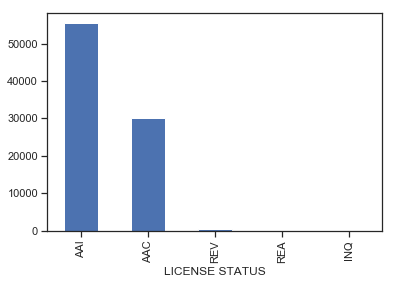

In [40]:
print(dataset.groupby(['LICENSE STATUS'])['LICENSE STATUS'].count().sort_values(ascending=False))
dataset.groupby(['LICENSE STATUS'])['LICENSE STATUS'].count().sort_values(ascending=False).plot.bar()

In [41]:
# Need to encode dependen variable columns

LICENSE_STATUS = {'AAI':1,'AAC':2,'REV':3,'REA':4,'INQ':5}
dataset['LICENSE STATUS'] = dataset['LICENSE STATUS'].map(LICENSE_STATUS)
dataset.head()

,ID,LICENSE ID,ACCOUNT NUMBER,LICENSE STATUS,WARD_most_frequent,PRECINCT_most_frequent,POLICE DISTRICT_most_frequent,LATITUDE_most_frequent,LONGITUDE_most_frequent,SSA_mean,WARD PRECINCT_NA,WARD_NA,PRECINCT_NA,POLICE DISTRICT_NA,SSA_NA,LICENSE STATUS CHANGE DATE_NA,LATITUDE_NA,LONGITUDE_NA,DATE ISSUED_Year,DATE ISSUED_Month,DATE ISSUED_Day,APPLICATION REQUIREMENTS COMPLETE_random_Year,APPLICATION REQUIREMENTS COMPLETE_random_Month,APPLICATION REQUIREMENTS COMPLETE_random_Day,LICENSE TERM START DATE_random_Year,LICENSE TERM START DATE_random_Month,LICENSE TERM START DATE_random_Day,LICENSE TERM EXPIRATION DATE_random_Year,LICENSE TERM EXPIRATION DATE_random_Month,LICENSE TERM EXPIRATION DATE_random_Day,LICENSE APPROVED FOR ISSUANCE_random_Year,LICENSE APPROVED FOR ISSUANCE_random_Month,LICENSE APPROVED FOR ISSUANCE_random_Day,PAYMENT DATE_random_Year,PAYMENT DATE_random_Month,PAYMENT DATE_random_Day,LICENSE STATUS CHANGE DATE_most_frequent_Year,LICENSE STATUS CHANGE DATE_most_frequent_Month,LICENSE STATUS CHANGE DATE_most_frequent_Day,LEGAL NAME_freq,SITE NUMBER_freq,DOING BUSINESS AS NAME_freq,ADDRESS_freq,CITY_freq,ZIP CODE_random_freq,STATE_freq,LICENSE CODE_freq,LICENSE NUMBER_freq,LICENSE DESCRIPTION_freq,WARD PRECINCT_most_frequent_freq,APPLICATION TYPE_C_EXPA,APPLICATION TYPE_C_LOC,APPLICATION TYPE_ISSUE,APPLICATION TYPE_RENEW,CONDITIONAL APPROVAL_Y
0,35342-20020816,1256593,32811,1,22.0,28.0,10.0,41.843613,-87.714618,25.00000,0,0,0,0,0,1,0,0,2006,4,1,2002,6,4,2002,8,4,2003,8,4,2002,8,2,2002,8,2,2012,12,5,1,61476,1,1,36744,356,80544,50078,1,50078,32,0,0,0,1,0
1,1358463-20051116,1639294,262311,2,33.0,23.0,17.0,41.961132,-87.699626,60.00000,0,0,0,0,0,0,0,0,2006,6,0,2005,9,3,2005,11,2,2006,11,2,2006,4,2,2005,11,3,2006,6,3,30,22,30,11,36744,889,80544,525,1,525,24,0,0,0,1,0
2,1980233-20090722,1980233,345008,1,42.0,9.0,18.0,41.908729,-87.654726,29.15208,1,1,1,1,1,1,1,1,2009,7,2,2009,7,2,2009,7,2,2011,7,4,2009,7,2,2009,7,2,2012,12,5,2,61476,5,2,27,158,80544,10632,1,10632,51146,0,0,1,0,0
3,1476582-20040211,1476582,273121,1,42.0,9.0,18.0,41.908729,-87.654726,29.15208,1,1,1,1,1,1,1,1,2004,2,2,2004,2,1,2004,2,2,2005,2,1,2004,2,1,2004,2,1,2012,12,5,6,61476,4,2,327,302,80544,50078,2,50078,51146,0,0,1,0,0
4,1141408-20080516,1896750,213785,1,42.0,9.0,18.0,41.908729,-87.654726,29.15208,1,1,1,1,1,1,1,1,2008,6,3,2008,3,0,2008,5,4,2010,5,5,2008,6,2,2008,6,2,2012,12,5,8,61476,8,8,163,34,80544,50078,8,50078,51146,0,0,0,1,0


In [42]:
testset.isnull().sum()

ID                                                0
LICENSE ID                                        0
ACCOUNT NUMBER                                    0
WARD_most_frequent                                0
PRECINCT_most_frequent                            0
POLICE DISTRICT_most_frequent                     0
LATITUDE_most_frequent                            0
LONGITUDE_most_frequent                           0
SSA_mean                                          0
WARD PRECINCT_NA                                  0
WARD_NA                                           0
PRECINCT_NA                                       0
POLICE DISTRICT_NA                                0
SSA_NA                                            0
LICENSE STATUS CHANGE DATE_NA                     0
LATITUDE_NA                                       0
LONGITUDE_NA                                      0
DATE ISSUED_Year                                  0
DATE ISSUED_Month                                 0
DATE ISSUED_

# Done with Data Preprocessing... Now we will Apply our model on the data

In [43]:
trainColumns = dataset.columns.values

In [44]:
testset.columns.values


array(['ID', 'LICENSE ID', 'ACCOUNT NUMBER', 'WARD_most_frequent',
       'PRECINCT_most_frequent', 'POLICE DISTRICT_most_frequent',
       'LATITUDE_most_frequent', 'LONGITUDE_most_frequent', 'SSA_mean',
       'WARD PRECINCT_NA', 'WARD_NA', 'PRECINCT_NA', 'POLICE DISTRICT_NA',
       'SSA_NA', 'LICENSE STATUS CHANGE DATE_NA', 'LATITUDE_NA',
       'LONGITUDE_NA', 'DATE ISSUED_Year', 'DATE ISSUED_Month',
       'DATE ISSUED_Day', 'APPLICATION REQUIREMENTS COMPLETE_random_Year',
       'APPLICATION REQUIREMENTS COMPLETE_random_Month',
       'APPLICATION REQUIREMENTS COMPLETE_random_Day',
       'LICENSE TERM START DATE_random_Year',
       'LICENSE TERM START DATE_random_Month',
       'LICENSE TERM START DATE_random_Day',
       'LICENSE TERM EXPIRATION DATE_random_Year',
       'LICENSE TERM EXPIRATION DATE_random_Month',
       'LICENSE TERM EXPIRATION DATE_random_Day',
       'LICENSE APPROVED FOR ISSUANCE_random_Year',
       'LICENSE APPROVED FOR ISSUANCE_random_Month',
       '

In [45]:
for value in testset.columns.values:
    if value in dataset.columns.values:
        continue
    else:
        print (value)

APPLICATION TYPE_C_SBA


In [46]:
testset = testset.drop(['APPLICATION TYPE_C_SBA'], axis = 1)

In [47]:
testset.head()

,ID,LICENSE ID,ACCOUNT NUMBER,WARD_most_frequent,PRECINCT_most_frequent,POLICE DISTRICT_most_frequent,LATITUDE_most_frequent,LONGITUDE_most_frequent,SSA_mean,WARD PRECINCT_NA,WARD_NA,PRECINCT_NA,POLICE DISTRICT_NA,SSA_NA,LICENSE STATUS CHANGE DATE_NA,LATITUDE_NA,LONGITUDE_NA,DATE ISSUED_Year,DATE ISSUED_Month,DATE ISSUED_Day,APPLICATION REQUIREMENTS COMPLETE_random_Year,APPLICATION REQUIREMENTS COMPLETE_random_Month,APPLICATION REQUIREMENTS COMPLETE_random_Day,LICENSE TERM START DATE_random_Year,LICENSE TERM START DATE_random_Month,LICENSE TERM START DATE_random_Day,LICENSE TERM EXPIRATION DATE_random_Year,LICENSE TERM EXPIRATION DATE_random_Month,LICENSE TERM EXPIRATION DATE_random_Day,LICENSE APPROVED FOR ISSUANCE_random_Year,LICENSE APPROVED FOR ISSUANCE_random_Month,LICENSE APPROVED FOR ISSUANCE_random_Day,PAYMENT DATE_random_Year,PAYMENT DATE_random_Month,PAYMENT DATE_random_Day,LICENSE STATUS CHANGE DATE_most_frequent_Year,LICENSE STATUS CHANGE DATE_most_frequent_Month,LICENSE STATUS CHANGE DATE_most_frequent_Day,LEGAL NAME_freq,SITE NUMBER_freq,DOING BUSINESS AS NAME_freq,ADDRESS_freq,CITY_freq,ZIP CODE_random_freq,STATE_freq,LICENSE CODE_freq,LICENSE NUMBER_freq,LICENSE DESCRIPTION_freq,WARD PRECINCT_most_frequent_freq,APPLICATION TYPE_C_EXPA,APPLICATION TYPE_C_LOC,APPLICATION TYPE_ISSUE,APPLICATION TYPE_RENEW,CONDITIONAL APPROVAL_Y
0,1516615-20120216,2132209,280120,42.0,67.0,18.0,41.890047,-87.637467,29.852653,0,0,0,0,1,0,0,0,2012,1,4,2011,12,3,2012,2,3,2014,2,5,2012,1,3,2012,1,3,2012,12,5,1,39620,1,6,56597,2048,56912,476,1,476,78,0,0,0,1,0
1,69813-20110616,2090759,65043,16.0,5.0,7.0,41.786485,-87.676665,29.852653,0,0,0,0,1,0,0,0,2012,11,0,2011,4,4,2011,6,3,2013,6,5,2012,11,4,2012,11,4,2012,12,5,3,39620,3,3,56597,685,56912,28094,1,28094,34,0,0,0,1,0
2,1519227-20041116,1541990,281270,4.0,8.0,1.0,41.868269,-87.625695,29.852653,0,0,0,0,1,1,0,0,2004,12,1,2004,9,0,2004,11,1,2005,11,1,2004,12,0,2004,12,0,2012,12,5,2,39620,2,2,56597,644,56912,476,2,476,20,0,0,0,1,0
3,1922025-20100816,2041053,335243,9.0,33.0,5.0,41.655762,-87.608686,29.852653,0,0,0,0,1,0,0,0,2010,11,3,2010,6,1,2010,8,0,2012,8,2,2016,7,1,2010,11,3,2012,12,0,1,39620,1,1,56597,23,56912,127,1,127,3,0,0,0,1,0
4,1675683-20070816,1837158,283018,15.0,26.0,9.0,41.816969,-87.699785,39.000000,0,0,0,0,0,0,0,0,2007,8,3,2007,6,3,2007,8,3,2009,6,0,2007,8,2,2007,8,2,2008,3,2,3,2963,3,2,56597,1534,56912,28094,2,28094,43,0,0,0,1,0


In [48]:
models = []
acc = []
precision = []
recall = []
f1 = []

In [49]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [50]:
X = dataset.drop(['ID','LICENSE ID','ACCOUNT NUMBER','LICENSE STATUS'], axis=1).values
y = dataset['LICENSE STATUS'].values

test = testset.drop(['ID','LICENSE ID','ACCOUNT NUMBER'], axis=1).values

In [51]:
test.shape

(57239, 51)

In [52]:
#sm = SMOTE(random_state=101)
#X_res, y_res = sm.fit_sample(X, y.ravel())

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=101)

In [54]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#test = sc.transform(test)

In [55]:
test.shape

(57239, 51)

In [56]:
test_data = sc.transform(test)
test_data.shape

(57239, 51)

In [57]:
sc.mean_

array([ 3.63116008e+01,  2.44137879e+01,  1.63338877e+01,  4.18961284e+01,
       -8.76666902e+01,  2.91431246e+01,  5.77130977e-01,  5.77147609e-01,
        6.57912682e-01,  6.26544699e-01,  8.90261954e-01,  6.43708940e-01,
        5.48706861e-01,  5.48706861e-01,  2.00714269e+03,  5.16901455e+00,
        2.00427443e+00,  2.00674151e+03,  7.71153430e+00,  1.85807900e+00,
        2.00708314e+03,  5.05259044e+00,  2.78443243e+00,  2.00849835e+03,
        4.79881913e+00,  3.09874428e+00,  2.00707556e+03,  5.61734719e+00,
        1.90346778e+00,  2.00714061e+03,  4.99768815e+00,  2.01548441e+00,
        2.01104301e+03,  1.06316840e+01,  4.24678586e+00,  1.15853971e+01,
        4.65024115e+04,  9.16974636e+00,  8.40868191e+00,  1.59765969e+04,
        3.42472798e+02,  7.55785111e+04,  3.09203467e+04,  3.38325156e+00,
        3.09203467e+04,  3.04150562e+04,  8.31600832e-05,  1.58669439e-02,
        2.70735967e-01,  7.13247401e-01,  2.66112266e-04])

In [58]:
sc.var_

array([1.25876676e+02, 9.39655937e+03, 2.42900325e+01, 3.07569532e-03,
       1.61528102e-03, 3.33979766e+01, 2.44050812e-01, 2.44048246e-01,
       2.25063585e-01, 2.33986439e-01, 9.76956071e-02, 2.29347741e-01,
       2.47627642e-01, 2.47627642e-01, 1.26256116e+01, 1.20429185e+01,
       1.90419795e+00, 1.41894133e+01, 1.52220017e+01, 2.14343431e+00,
       1.28640892e+01, 1.14604858e+01, 3.55624164e+00, 1.62637686e+01,
       1.12426198e+01, 3.93804167e+00, 1.32627648e+01, 1.41026080e+01,
       2.31813267e+00, 1.26537931e+01, 1.20008429e+01, 2.21586003e+00,
       5.90115218e+00, 8.94733708e+00, 2.33294289e+00, 3.76804439e+03,
       5.73495660e+08, 2.57220696e+03, 1.80657177e+03, 3.24555275e+08,
       6.23948729e+04, 3.71752740e+08, 5.19984937e+08, 8.40129288e+00,
       5.19984937e+08, 6.28185384e+08, 8.31531676e-05, 1.56151840e-02,
       1.97438003e-01, 2.04525546e-01, 2.66041450e-04])

# Logistic Regression model on the preprocess dataset

In [59]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)
models.append('Logistic Regression')

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [60]:
X_train.shape

(60125, 51)

In [61]:
#Save the model on disk
pk.dump(lr, open('logistic_regression.sav','wb'))

In [62]:
lr.coef_

array([[ 5.27276235e-04,  2.99717153e-01,  6.47403542e-02,
        -3.09168397e-03,  1.44911352e-04, -4.74634232e-02,
         1.21388633e-02,  1.19839484e-02,  2.93051450e-01,
         1.07489473e-01, -1.78547100e-02,  4.17285134e+00,
         5.50170117e-02,  5.50170117e-02, -1.28658393e-01,
        -1.15357975e-02,  1.76174850e-02, -1.44401438e-01,
        -6.09051465e-02, -8.03434188e-03, -1.53958927e-01,
         2.41428895e-02,  5.35431972e-02, -2.24573578e-01,
        -9.15926483e-02, -1.32829869e-01,  2.26114337e-02,
        -1.52229831e-02,  9.68041621e-02, -1.52662828e-01,
         8.54903648e-03,  3.74504122e-02,  1.01687487e+00,
         1.20180166e+00,  1.31015218e+00,  1.38137172e-02,
        -3.73307105e-02,  1.57492432e-02,  1.53630013e-02,
        -2.22284564e-02,  1.41246564e-02, -5.11394595e-02,
         2.73284648e-01,  2.41043314e-01,  2.73284648e-01,
         8.98348517e-02, -2.37993896e-02,  7.42157997e-02,
         1.33447738e-02, -3.25175337e-02, -4.24739572e-0

In [63]:
lr.intercept_

array([ 5.06282003,  2.56782289, -2.18427282, -2.79915119, -2.64721892])

In [64]:
lr.n_iter_

array([100])

In [65]:
lr.predict(X_test)

array([1, 2, 1, ..., 1, 2, 1], dtype=int64)

In [66]:
probs = lr.predict_proba(X_test)
probs

array([[9.99991535e-01, 6.13147850e-06, 4.34732232e-08, 2.28991009e-07,
        2.06079030e-06],
       [2.39504292e-07, 9.22197906e-01, 7.77704957e-02, 3.05846118e-05,
        7.74364435e-07],
       [9.99986192e-01, 5.11061284e-06, 4.22150141e-08, 4.38802082e-08,
        8.61155752e-06],
       ...,
       [9.99987175e-01, 3.82822425e-06, 1.06289746e-09, 2.93516661e-07,
        8.70247477e-06],
       [1.62568558e-09, 9.99538738e-01, 4.18670834e-04, 1.35354399e-05,
        2.90540797e-05],
       [9.98537741e-01, 6.36161937e-05, 9.39047110e-05, 1.30255591e-03,
        2.18174671e-06]])

In [67]:
#Load Model to predict

loaded_model_lr = pk.load(open('logistic_regression.sav', 'rb'))


### Evaluation

In [68]:
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, 
                             recall_score, f1_score)

In [70]:
# print('Confusion Matrix for LR: \n',confusion_matrix(y_test, lr.predict(X_test)))
# print('Accuracy for LR: \n',accuracy_score(y_test, lr.predict(X_test)))
# acc.append(accuracy_score(y_test, lr.predict(X_test)))
# print('Precision for LR: \n',precision_score(y_test, lr.predict(X_test),average='micro'))
# precision.append(precision_score(y_test, lr.predict(X_test)))
# print('Recall for LR: \n',recall_score(y_test, lr.predict(X_test), average='micro'))
# recall.append(recall_score(y_test, lr.predict(X_test)))
# print('f1_score for LR: \n',f1_score(y_test, lr.predict(X_test), average='micro'))
# f1.append(f1_score(y_test, lr.predict(X_test)))

In [ ]:
lr_results = lr.predict(test_data)
lr_results

In [ ]:
testset['LICENSE STATUS'] = lr_results

In [ ]:
# Need to encode dependen variable columns

REVERT_LICENSE_STATUS = {1:'AAI',2:'AAC',3:'REV',4:'REA',5:'INQ'}
testset['LICENSE STATUS'] = testset['LICENSE STATUS'].map(REVERT_LICENSE_STATUS)
testset.head()

In [ ]:
output = testset[['ID','LICENSE STATUS']]
output.to_csv("Logistic_Result.csv", index = False)

In [ ]:
testset.groupby(['LICENSE STATUS'])['LICENSE STATUS'].count().sort_values(ascending=False).plot.bar()

# Now I will apply Random Forest Algorithm on this data to improve my Result

In [ ]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', random_state = 0)
rf.fit(X_train, y_train)
models.append('Random Forest')

In [ ]:
#Save the model on disk
pk.dump(rf, open('Random_forest.sav','wb'))

#loaded_rf = pk.load(open('Random_forest.sav','rb'))

In [ ]:
rf.predict(X_test)

### Evaluation

In [ ]:
print('Confusion Matrix for RF: \n',confusion_matrix(y_test, rf.predict(X_test)))
print('Accuracy for RF: \n',accuracy_score(y_test, rf.predict(X_test)))
acc.append(accuracy_score(y_test, rf.predict(X_test)))
print('Precision for RF: \n',precision_score(y_test, rf.predict(X_test), average='micro'))
precision.append(precision_score(y_test, rf.predict(X_test), average='micro'))
print('Recall for RF: \n',recall_score(y_test, rf.predict(X_test), average='micro'))
recall.append(recall_score(y_test, rf.predict(X_test), average='micro'))
print('f1_score for RF: \n',f1_score(y_test, rf.predict(X_test), average='micro'))
f1.append(f1_score(y_test, rf.predict(X_test), average='micro'))

In [ ]:
rf_results = rf.predict(test_data)
rf_results

In [ ]:
testset['LICENSE STATUS'] = rf_results
testset['LICENSE STATUS'] = testset['LICENSE STATUS'].map(REVERT_LICENSE_STATUS)
testset.head()
output = testset[['ID','LICENSE STATUS']]
output.to_csv("RF_Result.csv", index = False)

In [ ]:
testset.groupby(['LICENSE STATUS'])['LICENSE STATUS'].count().sort_values(ascending=False).plot.bar()

In [ ]:
# Feature Selection from Random Forest Classification

In [ ]:
rf.feature_importances_

In [ ]:
dataset.columns[4:]

In [ ]:
feat_imps = pd.concat([pd.DataFrame(dataset.columns[4:], columns=['Features']),
                       pd.DataFrame(rf.feature_importances_, columns=['Importances'])],
                     axis=1)
feat_imps

In [ ]:
feat_imps = feat_imps.sort_values(['Importances'], ascending=False)
feat_imps

In [ ]:
feat_imps['Cumulative Importances'] = feat_imps['Importances'].cumsum()
feat_imps

In [ ]:
feat_imps = feat_imps[feat_imps['Cumulative Importances'] < 0.95]
feat_imps

In [ ]:
feat_imps['Features'].tolist()

In [ ]:
cols = dataset.columns[4:]

In [ ]:
def feature_select(X, y, cols, cutoff):
    regressor = RandomForestClassifier(n_estimators = 300, random_state = 0)
    regressor.fit(X, y)
    feat_imps = pd.concat([pd.DataFrame(cols, columns=['Features']),
                       pd.DataFrame(rf.feature_importances_, columns=['Importances'])],axis=1)
    feat_imps = feat_imps.sort_values(['Importances'], ascending=False)
    feat_imps['Cumulative Importances'] = feat_imps['Importances'].cumsum()
    feat_imps = feat_imps[feat_imps['Cumulative Importances'] < cutoff]
    return feat_imps['Features'].tolist()    

In [ ]:
imp_cols = feature_select(X, y, cols, 0.95)
imp_cols

### Using Selected Features only for Model training

In [ ]:
X = dataset[imp_cols].values
X.shape

In [ ]:
y = dataset['LICENSE STATUS'].values
y.shape

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
meanX = sc_X.mean_
varX = sc_X.var_

X_test = sc_X.transform(X_test)

In [ ]:
# Fitting Multi Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
log_regressor = LogisticRegression(n_jobs=-1)
log_regressor.fit(X_train, y_train)

In [ ]:
print('Confusion Matrix for LR: \n',confusion_matrix(y_test, log_regressor.predict(X_test)))
print('Accuracy for LR: \n',accuracy_score(y_test, log_regressor.predict(X_test)))
acc.append(accuracy_score(y_test, log_regressor.predict(X_test)))
print('Precision for LR: \n',precision_score(y_test, log_regressor.predict(X_test),average='micro'))
precision.append(precision_score(y_test, log_regressor.predict(X_test), average='micro'))
print('Recall for LR: \n',recall_score(y_test, log_regressor.predict(X_test), average='micro'))
recall.append(recall_score(y_test, log_regressor.predict(X_test), average='micro'))
print('f1_score for LR: \n',f1_score(y_test, log_regressor.predict(X_test), average='micro'))
f1.append(f1_score(y_test, log_regressor.predict(X_test), average='micro'))

In [ ]:
testData = testset[imp_cols].values
testData = sc_X.transform(testData)

In [ ]:
log_regressor_results = log_regressor.predict(testData)

In [ ]:
testset['LICENSE STATUS'] = log_regressor_results
testset['LICENSE STATUS'] = testset['LICENSE STATUS'].map(REVERT_LICENSE_STATUS)
testset.head()
output = testset[['ID','LICENSE STATUS']]
output.to_csv("log_regressor_results.csv", index = False)